In [39]:
import xarray as xa
import numpy as np
import datetime

In [2]:
file = '/Users/bell/Programs/Python/EcoFOCI_MooringAnalysis/data/19BSM2A_T_20_gridded.cf.nc'

start_date = '2019-04-15'
end_date = '2019-10-01'

In [3]:
xdf = xa.load_dataset(file)

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean
### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

Text(0,0.5,'Depth (m)')

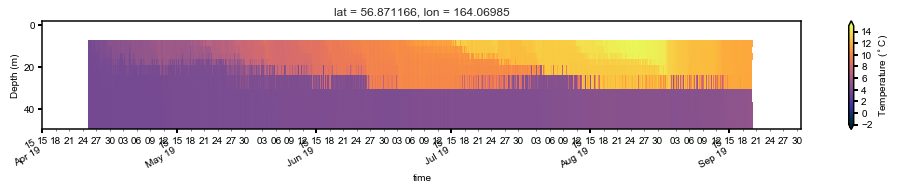

In [54]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = xdf.where(xdf.T_20 != 1e35).T_20.T.plot(ax=ax,cmap=cmocean.cm.thermal,vmin=-2,vmax=15, add_colorbar=False)
ax.invert_yaxis()
ax.set_xlim(start_date, end_date)
ax.set_ylim(50, -2)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%d\n%b %y'))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: UserWarning: Discarding nonzero nanoseconds in conversion
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: UserWarning: Discarding nonzero nanoseconds in conversion
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0,0.5,'Depth (m)')

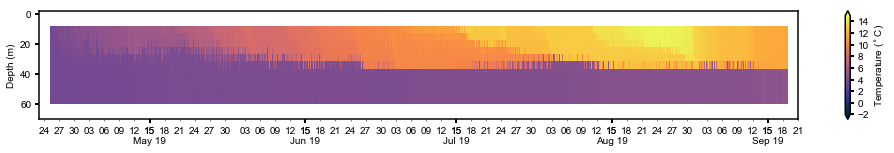

In [82]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = plt.imshow(
            xdf.where(xdf.T_20 != 1e35).T_20.T.values[0,0,:,:],
            extent=(pd.Timestamp(xdf.time.min().values).to_pydatetime().toordinal(),
                    pd.Timestamp(xdf.time.max().values).to_pydatetime().toordinal(),
                    xdf.depth.max(),
                    xdf.depth.min()),
            cmap=cmocean.cm.thermal,
            vmin=-2,
            vmax=15,
            aspect="auto",
        )
ax.invert_yaxis()
ax.set_xlim(pd.Timestamp(xdf.time.min().values).to_pydatetime().toordinal()-2, 
            pd.Timestamp(xdf.time.max().values).to_pydatetime().toordinal()+2)
ax.set_ylim(70, -2)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%d\n%b %y'))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')



In [56]:
xdf

<xarray.DataArray 'depth' ()>
array(9.)

In [77]:
pd.Timestamp(xdf.time.min().values).to_pydatetime()

datetime.datetime(2019, 4, 25, 0, 0)

In [75]:
xdf.time.max().values

numpy.datetime64('2019-09-19T23:59:59.000000512')